In [ ]:
pip install dmba==0.0.18

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 5.1 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from dmba import regressionSummary

# 데이터 로드 및 전처리

In [ ]:
df_t = pd.read_csv("/content/drive/MyDrive/2022_IPS/final_data/지역명_사망자수(train).csv")
df_t = df_t.drop(columns=['Unnamed: 0'])
df_t.head()

,지역명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수,사망자수
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


In [ ]:
# column 이름 변경
columns = ['loc','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf','death']
var_name = pd.DataFrame(df_t.columns, columns, columns=['meaning'])
var_name

,meaning
loc,지역명
cnt_hos,병원수
bed,격리병상수
remain_bed,남은 격리병상수
pop,총인구
nurse,요양기관수
total60,60세 이상 - 계
60-64,60~64세
65-69,65~69세
70-74,70~74세


In [ ]:
df_t.columns = columns
df_t.head()

,loc,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,강원도,18.0,539.0,75.0,1347375.0,34.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,경상남도,35.0,940.0,176.0,3295942.0,129.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,경상북도,29.0,1046.0,271.0,2583157.0,111.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,광주광역시,19.0,240.0,55.0,1477573.0,60.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,대구광역시,18.0,876.0,249.0,2410700.0,75.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


In [ ]:
df_t.isnull().sum()

loc           0
cnt_hos       0
bed           0
remain_bed    0
pop           0
nurse         0
total60       0
60-64         0
65-69         0
70-74         0
75-79         0
80-84         0
85-           0
conf          0
death         0
dtype: int64

In [ ]:
df_t.describe()

,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
count,46.000000,46.000000,46.000000,4.600000e+01,46.000000,4.600000e+01,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000
mean,8.413043,272.413043,57.326087,1.098182e+06,31.869565,2.442271e+05,79446.739130,56014.543478,41601.173913,32225.586957,21506.717391,13432.304348,3.743489e+05,491.891304
std,11.066619,413.062577,82.812252,1.503566e+06,39.539914,3.496986e+05,110989.914064,82314.702296,62400.667106,47034.936539,29936.345378,18365.208265,5.324642e+05,738.059625
min,0.000000,0.000000,0.000000,4.227800e+04,1.000000,1.457500e+04,4048.000000,2968.000000,2560.000000,2228.000000,1716.000000,1055.000000,1.373900e+04,16.000000
25%,1.250000,25.250000,4.250000,2.493765e+05,6.000000,4.880250e+04,16350.250000,11151.750000,7884.750000,5791.500000,4028.750000,2653.500000,9.096875e+04,102.000000
50%,4.000000,79.000000,13.500000,5.424290e+05,12.000000,1.040370e+05,36414.500000,22951.500000,16430.000000,12558.000000,8483.000000,5437.000000,2.139030e+05,221.000000
75%,13.000000,337.750000,75.750000,1.445024e+06,40.750000,2.976098e+05,101326.250000,68907.250000,51624.750000,38378.250000,24082.500000,14772.750000,4.825620e+05,599.750000
max,47.000000,2150.000000,361.000000,9.231569e+06,169.000000,2.045748e+06,654912.000000,485063.000000,369940.000000,272798.000000,163781.000000,99254.000000,3.391551e+06,4504.000000


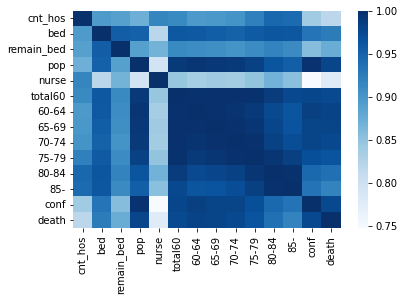

In [ ]:
# 상관계수 확인
cor = df_t.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Blues)
plt.show()

In [ ]:
cor_target = abs(cor['death'])
print(cor_target)

cnt_hos       0.818782
bed           0.926360
remain_bed    0.875229
pop           0.980030
nurse         0.777331
total60       0.975518
60-64         0.982107
65-69         0.981163
70-74         0.977170
75-79         0.966108
80-84         0.937456
85-           0.919580
conf          0.977063
death         1.000000
Name: death, dtype: float64


In [ ]:
# 상관계수 값이 0.9가 넘는 column만 선택
selected_cols = cor_target[cor_target > 0.9]
print("selected columns (correlation with target > 0.9)")
print(selected_cols)

df_t_sel = df_t[selected_cols.index]
df_t_sel.head()

selected columns (correlation with target > 0.9)
bed        0.926360
pop        0.980030
total60    0.975518
60-64      0.982107
65-69      0.981163
70-74      0.977170
75-79      0.966108
80-84      0.937456
85-        0.919580
conf       0.977063
death      1.000000
Name: death, dtype: float64


,bed,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,death
0,539.0,1347375.0,369970,116558,81374,56864,53119,38211,23844,440985.0,746
1,940.0,3295942.0,774696,253193,179622,128375,99667,70217,43622,1052389.0,1134
2,1046.0,2583157.0,719154,213011,162533,119640,100383,75400,48187,731978.0,1203
3,240.0,1477573.0,290547,96662,65287,52134,38610,23826,14028,518968.0,520
4,876.0,2410700.0,559877,182705,133421,95965,73211,47435,27140,734292.0,1243


# train, validation, test set 생성

In [ ]:
# data
X = df_t_sel.drop(columns=['death'])
# target
y = df_t_sel['death']

# train set : test set = 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
# train set : validation set = 8:2
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [ ]:
print('train set', X_train.shape, y_train.shape)
print('validation set', X_valid.shape, y_valid.shape)
print('test set', X_test.shape, y_test.shape)

train set (28, 10) (28,)
validation set (8, 10) (8,)
test set (10, 10) (10,)


# Linear Regression

In [ ]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_pred = lnr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print('r2 score is ' + str(r2))

r2 score is 0.9108452304631667


In [ ]:
regressionSummary(y_test, lnr.predict(X_test))


Regression statistics

                      Mean Error (ME) : 44.5869
       Root Mean Squared Error (RMSE) : 108.5748
            Mean Absolute Error (MAE) : 81.9994
          Mean Percentage Error (MPE) : -16.2800
Mean Absolute Percentage Error (MAPE) : 41.9876


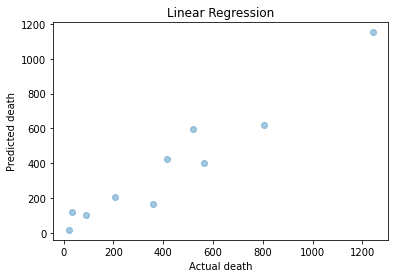

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title("Linear Regression")
plt.xlabel("Actual death")
plt.ylabel("Predicted death")
plt.show()

# Lasso Regression

In [ ]:
lar = Lasso(alpha=0.3)
lar.fit(X_train, y_train)
y_pred = lar.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e+05, tolerance: 5.469e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
r2 = r2_score(y_test, y_pred)
print('r2 score is ' + str(r2))

r2 score is 0.9214375952957784


In [ ]:
regressionSummary(y_test, lar.predict(X_test))


Regression statistics

                      Mean Error (ME) : 41.4287
       Root Mean Squared Error (RMSE) : 101.9212
            Mean Absolute Error (MAE) : 84.2486
          Mean Percentage Error (MPE) : -28.3506
Mean Absolute Percentage Error (MAPE) : 55.7047


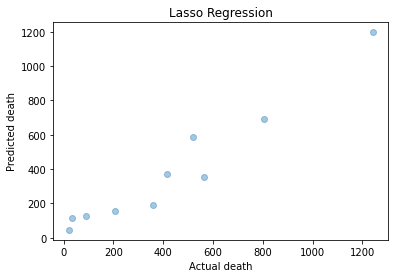

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title("Lasso Regression")
plt.xlabel("Actual death")
plt.ylabel("Predicted death")
plt.show()

# Ridge Regression

In [ ]:
rdr = Ridge(alpha=0.3)
rdr.fit(X_train, y_train)
y_pred = rdr.predict(X_test)

In [ ]:
r2 = r2_score(y_test, y_pred)
print('r2 score is ' + str(r2))

r2 score is 0.9108453111326925


In [ ]:
regressionSummary(y_test, rdr.predict(X_test))


Regression statistics

                      Mean Error (ME) : 44.5869
       Root Mean Squared Error (RMSE) : 108.5748
            Mean Absolute Error (MAE) : 81.9994
          Mean Percentage Error (MPE) : -16.2800
Mean Absolute Percentage Error (MAPE) : 41.9876


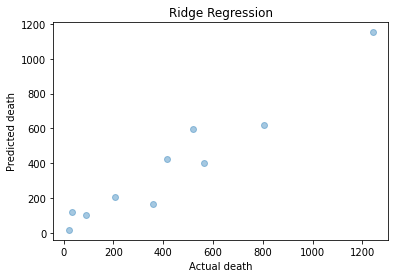

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.title("Ridge Regression")
plt.xlabel("Actual death")
plt.ylabel("Predicted death")
plt.show()

Lasso Regression이 미세한 차이로 성능이 가장 좋았고, Linear와 Ridge Regression는 성능이 유사했다.

# 실제 데이터에 적용

In [ ]:
# 사망자 수를 예측할 시군구 데이터
df_p = pd.read_csv("/content/drive/MyDrive/2022_IPS/final_data/시도명_시군구명(predict).csv").drop(columns=['Unnamed: 0'])
df_p.head()

,시도명,시군구명,병원수,격리병상수,남은 격리병상수,총인구,요양기관수,60세 이상 - 계,60~64세,65~69세,70~74세,75~79세,80~84세,85세이상,확진자수
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
# column 이름 변경
columns_p = ['loc_sido','loc_gun','cnt_hos','bed','remain_bed','pop','nurse','total60','60-64','65-69','70-74','75-79','80-84','85-','conf']
df_p.columns = columns_p
df_p.head()

,loc_sido,loc_gun,cnt_hos,bed,remain_bed,pop,nurse,total60,60-64,65-69,70-74,75-79,80-84,85-,conf
0,강원도,강릉시,3.0,79.0,24.0,216542.0,3.0,61339,18656,13586,9988,8900,6185,4024,65832.0
1,강원도,동해시,2.0,66.0,1.0,87801.0,3.0,24762,7662,5655,4087,3680,2278,1400,28349.0
2,강원도,삼척시,1.0,51.0,8.0,65939.0,1.0,21481,6050,4525,3591,3311,2377,1627,17543.0
3,강원도,속초시,2.0,119.0,5.0,80054.0,2.0,22194,7239,4986,3556,3055,2062,1296,27323.0
4,강원도,영월군,1.0,27.0,1.0,36282.0,1.0,14753,4248,3297,2309,2283,1671,945,9242.0


In [ ]:
# 선택할 features
print(df_t_sel.columns)

Index(['bed', 'pop', 'total60', '60-64', '65-69', '70-74', '75-79', '80-84',
       '85-', 'conf', 'death'],
      dtype='object')


In [ ]:
predictors = df_p.drop(columns=['loc_sido', 'loc_gun', 'cnt_hos', 'remain_bed', 'nurse'])

In [ ]:
# 사망자 수 예측
pred_death = []
for i in range(0, 206):
  pred_death.append(lar.predict(predictors.loc[[i]]))

In [ ]:
df_pred_death = df_p.drop(columns=['cnt_hos', 'remain_bed', 'nurse'])
df_pred_death['pred_death'] = pd.DataFrame(pred_death)
df_pred_death

,loc_sido,loc_gun,bed,pop,total60,60-64,65-69,70-74,75-79,80-84,85-,conf,pred_death
0,강원도,강릉시,79.0,216542.0,61339,18656,13586,9988,8900,6185,4024,65832.0,127.421377
1,강원도,동해시,66.0,87801.0,24762,7662,5655,4087,3680,2278,1400,28349.0,81.213674
2,강원도,삼척시,51.0,65939.0,21481,6050,4525,3591,3311,2377,1627,17543.0,64.760537
3,강원도,속초시,119.0,80054.0,22194,7239,4986,3556,3055,2062,1296,27323.0,77.341446
4,강원도,영월군,27.0,36282.0,14753,4248,3297,2309,2283,1671,945,9242.0,53.547330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,충청북도,제천시,32.0,134768.0,39959,12590,9246,6191,5764,3910,2258,42422.0,95.451470
202,충청북도,증평군,0.0,37183.0,8734,2788,1954,1337,1225,887,543,15155.0,41.077604
203,충청북도,진천군,67.0,89514.0,18410,5699,4030,2787,2445,2112,1337,34557.0,52.966438
204,충청북도,청주시,445.0,855326.0,162294,56336,37220,25076,20488,14104,9070,297157.0,339.136287


In [ ]:
df_pred_death.to_csv("라쏘회귀_예측결과.csv", mode='w', encoding='utf-8-sig')